**Содержание:**

1. Математическая постановка задачи

2. Решение задачи

3. Регуляризация - борьба с переобучением

4. Многоклассова классфикация

5. Реализация модели на numpy

6. Изучение реализации sklearn

7. Обучение разных реализаций и сравнение


## **1. Математическая постановка задачи логистической регрессии**

Логистическая регрессия решает задачу классификации и предсказывает вероятность класса. 

Формально задача классификации записывается так:
$X \in R^{n*p}$
$Y \in C^{n}$ и $|C| < \infty$ - мощность множества конечно.
Рассмотрим сначала задачу бинарной классификации $C = ${-1, 1}, а далее обобщим её на многоклассовую классификацию.
Нужно найти $f(X) = \hat{Y}: \hat{Y} \simeq Y$ и $f(X) \in [-1, 1]$

Идея следующая: будем строить гиперплоскость (линию) так, чтобы объекты разных классов лежали по разные стороны этой гиперплосткости:
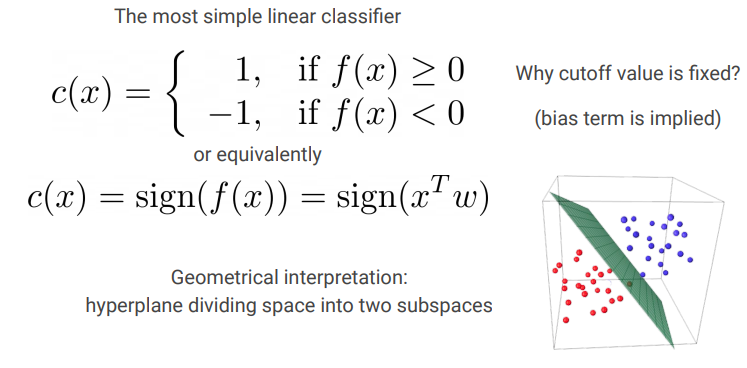, где $C(X)$ - модель классфифкатор

Геометрически вектор $w$ - нормаль гиперплоскости, а $x^Tw$ - проекция прямой от начала координат до точки x

Идея правильная, но мы учитываем лишь знак такого информативного скалярного произведения. Введём понятие **margin** (отступ)

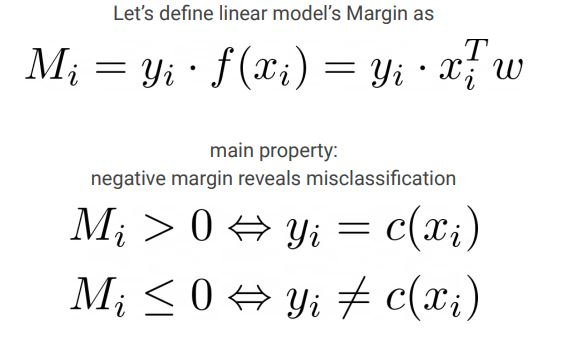

Логично, что если мы праильно предсказали класс, то с истинным значением он будет одного знака, т.е отступ будт больше нуля, и наоборот.

На основании этой информации мы может ввести функцию потерь, которая будет равна сумме всех марджинов, меньше нуля:

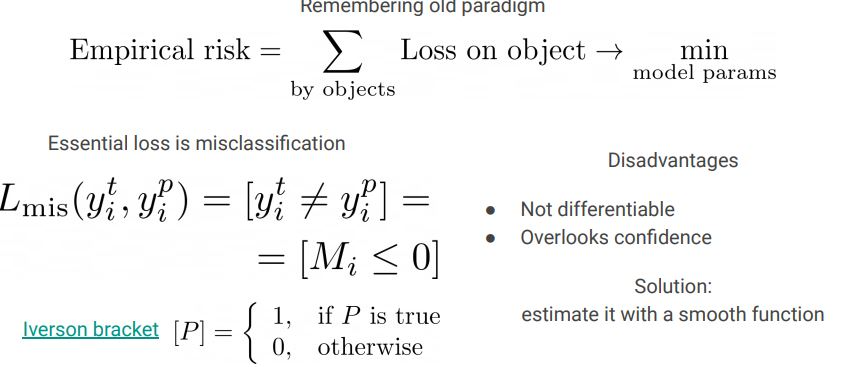

Но и тут есть свои недостатки: 1) Учитываем только неправильные отступы и не учитываем отступы с верными предсказаниями. 2) Недифференцируема

Но тут на помощь приходит квадратичная функция потерь, которая и дифференцируема, и учитывает все отступы:

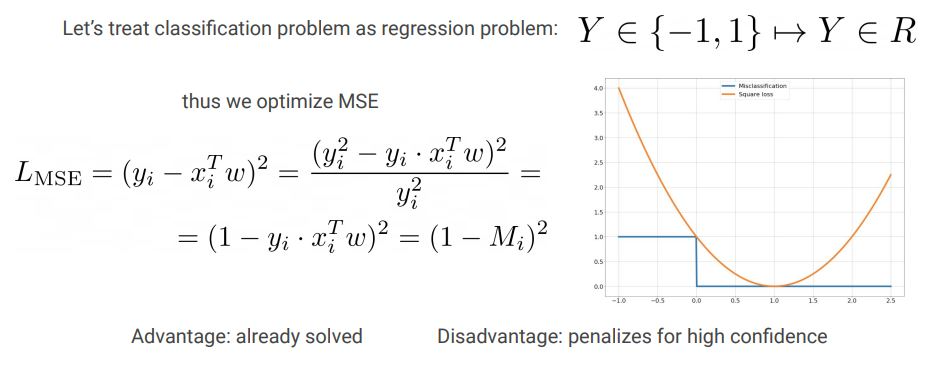

Но функция штрафует за уверенные предсказания

На самом деле перебирать лоссы можно очень долго:

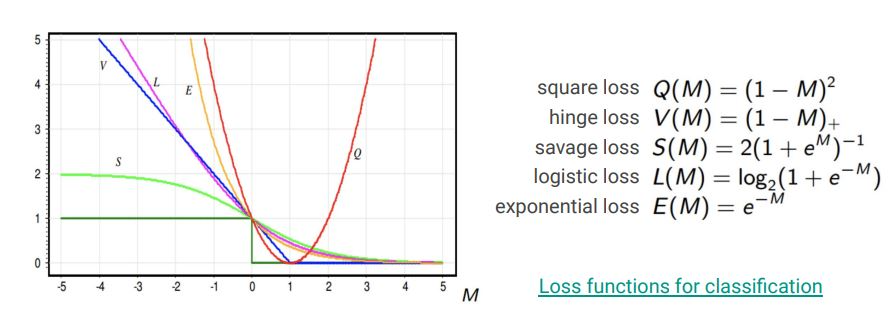

Наша задача - предсказать **вероятность** класса и подобрать адекватный дифференцируемый лосс. 

Как предсказать вероятность? Легче рассмотреть эту задачу на примере:
Хороший пример – предсказание кликов в интернете (например, в рекламе и поиске). Наличие клика в обучающем логе не означает, что, если повторить полностью условия эксперимента, пользователь обязательно кликнет по объекту опять. Скорее у объектов есть какая-то "кликабельность", то есть истинная вероятность клика по данному объекту. Клик на каждом обучающем примере является реализацией этой случайной величины, и мы считаем, что в пределе в каждой точке отношение положительных и отрицательных примеров должно сходиться к этой вероятности.

Проблема состоит в том, что вероятность, по определению, величина от 0 до 1, а простого способа обучить линейную модель так, чтобы это ограничение соблюдалось, нет. Из этой ситуации можно выйти так: научить линейную модель правильно предсказывать какой-то объект, связанный с вероятностью, но с диапазоном значений $(-\infty; +\infty)$, и преобразовать ответы модели в вероятность. Таким объектом является **logit** или log odds – логарифм отношения вероятности положительного события к отрицательному.

заметим, что метод называется **логистической регрессией**, а не логистической классификацией именно потому, что предсказываем мы не классы, а вещественные числа – логиты.

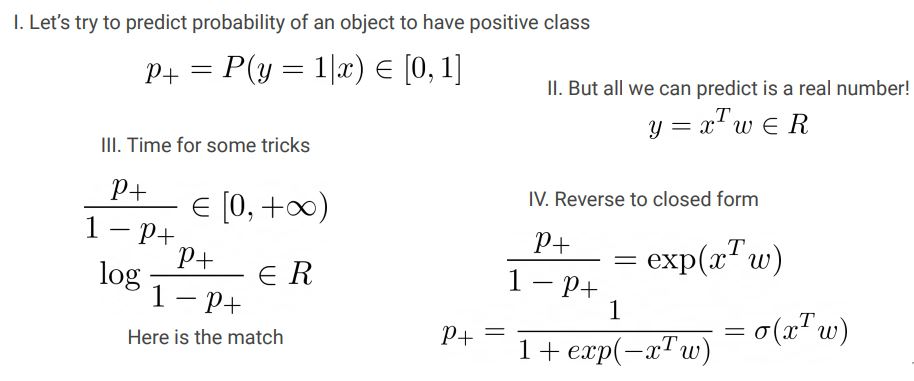


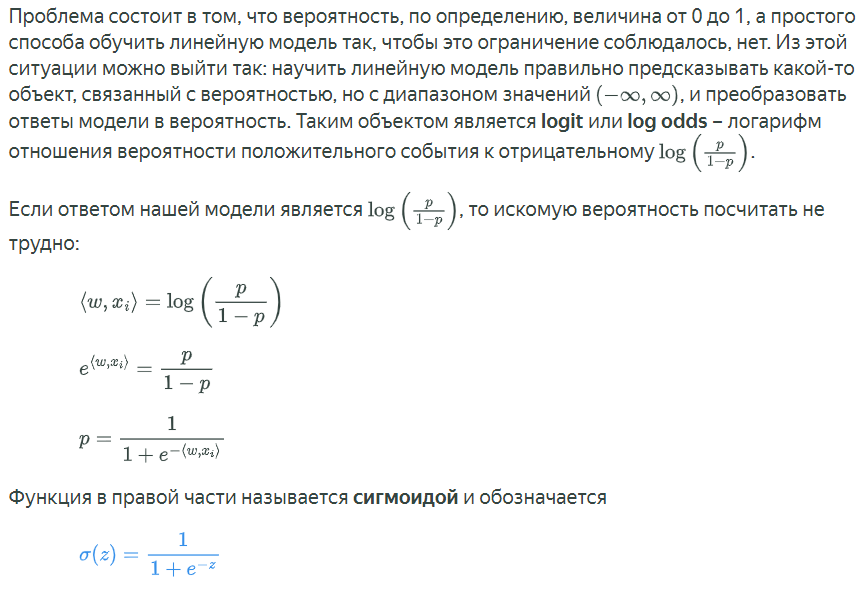

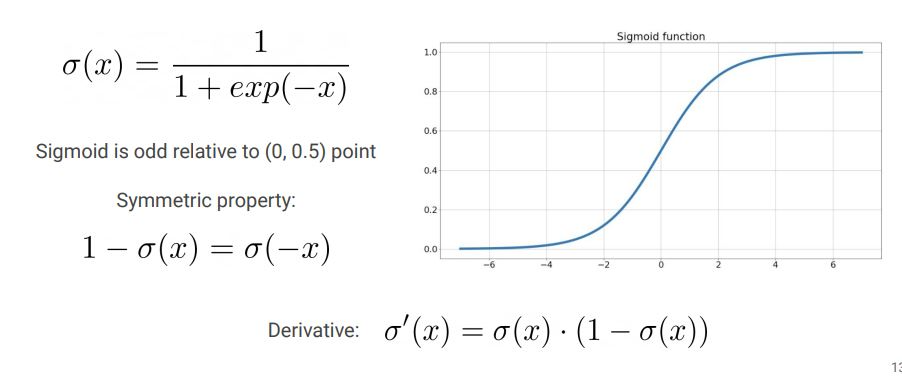

Отлично, мы научились предсказывать вероятность положительного класса с помощью сигмоиды, но всё ещё открыт вопрос подбора функции потерь. Как оптимизировать веса? В самом начале и примере мы уже
упоминали, что предсказываем случайную величину, а значит и лос должен быть откда-нибодь из теории вероятности. И такой есть. 

Нужно применить метод максимума правдоподобия для распределения Бернулли. Это самое простое распределение, которое возникает, к примеру, при бросках монетки, которая орлом выпадает с вероятностью $p$. У нас только событием будет не орёл, а то, что пользователь кликнул на объект с такой вероятностью $p$.

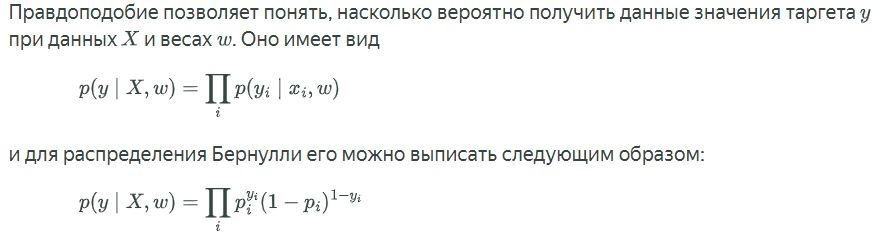
- верно для меток класса {0,1}

Оптимизировать произведение неудобно, хочется иметь дело с суммой, так что мы перейдём к логарифмическому правдоподобию:

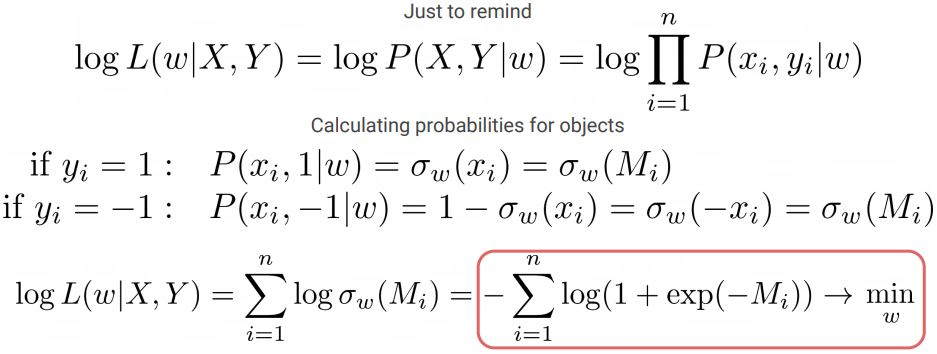

*LogLoss =* $\sum_i \big( y_i \log(\sigma(\langle w, x_i \rangle)) + (1-y_i)\log(1 - \sigma(\langle w, x_i \rangle)) \big)$ =  $\ell(w, X, y)=\sum_i \big( y_i \log(\sigma(\langle w, x_i \rangle)) + (1 - y_i) \log(\sigma(-\langle w, x_i \rangle)) \big)$, так как $\sigma(-z) = \frac{1}{1 + e^z} = \frac{e^{-z}}{e^{-z} + 1} = 1 - \sigma(z)$

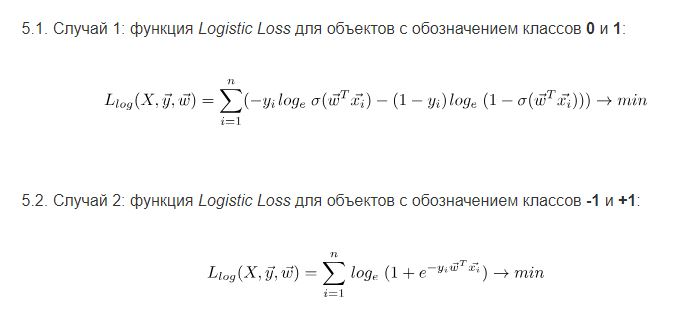 

[Хорошая статья](https://habr.com/ru/articles/485872/)

## **2. Решение задачи**

Решение задачи - это градиентный спуск. А для работы спуска нужно знать частные производные функции ошибки по $w$ и $b$. Вспоинаем, что договорились предсказывать вероятности: $p(<x_{i}, w>)$. Вычислим градиент:

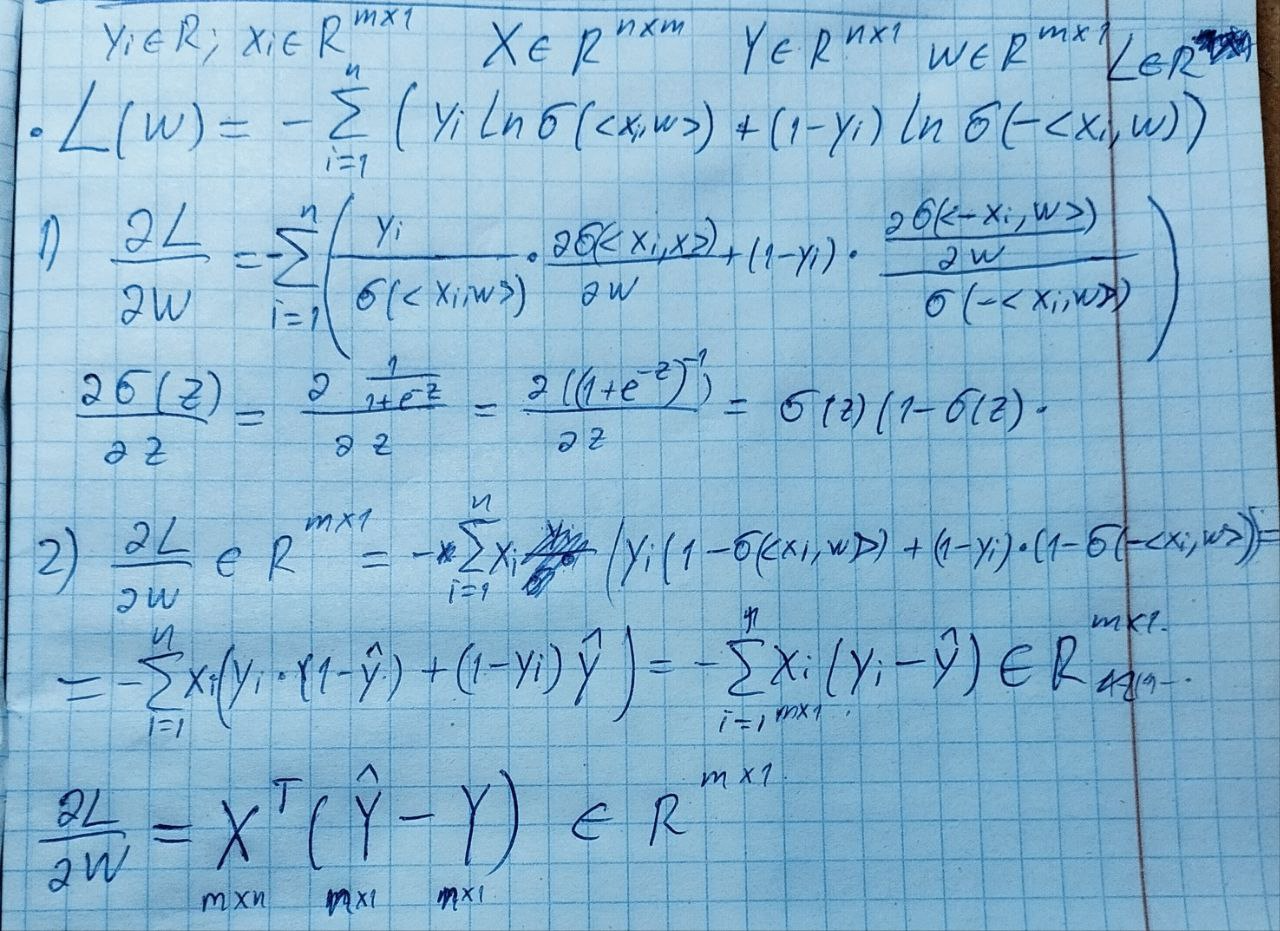

Аналогично рассчитывается для смещения и равен $-2*(Y - Y_{p})$

Удивительно, но градиент кросс-энтропии в точности равен градиенту MSE. Совпадение? НАверное, мы наткнулись на какой-то закон Вселенной и всего остального

## **3. Регуляризация - борьба с переобучением**

Логистическая регрессия так же как и линейная умеет переобучаться и для борьбы с переобучением всё так же используется L1 и L2 регуляризация. Она так же добавляется к лоссу. Всё в точности как и у линейной регрессии. !Перед обучением модели нормировать данные! Поэтому для подробностей см. Linear Regression\Linear_Regression.ipynb

## **4. Многоклассовая классфикация**

Описанная выше модель умеет предсказывать только два класса. Но что если у нас больше классов? Всё просто - свести задачу к бинарной классификации. Для этого есть два способа: **one-vs-all** и **one-vs-one**. Лучше показать картинку, чем описывать словами

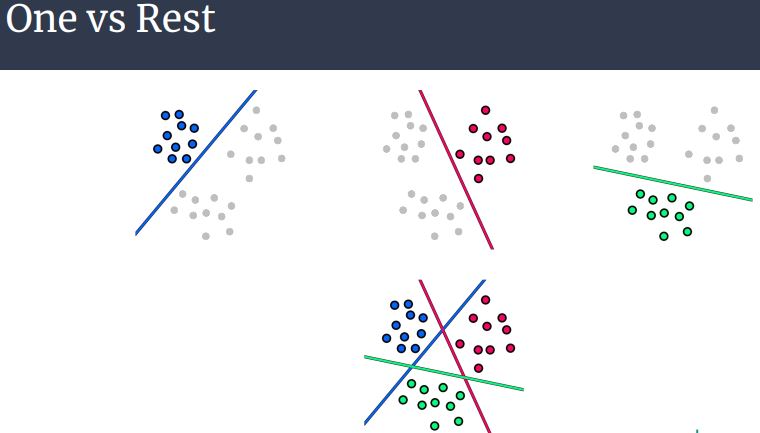

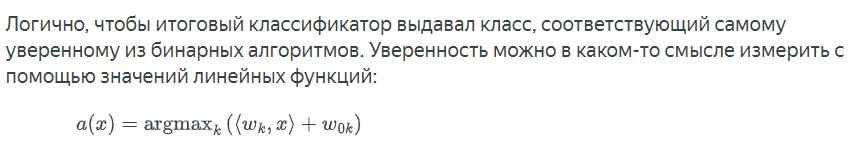

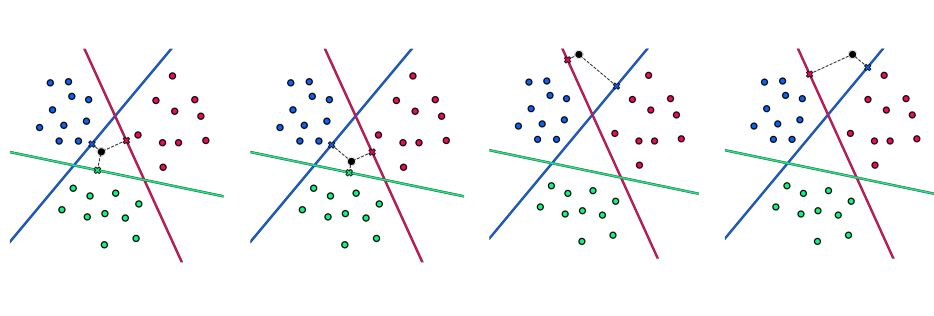

Таким способом не получится классифицировать синие объекты:

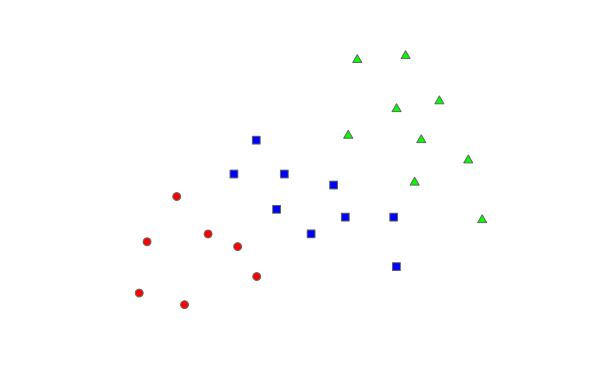

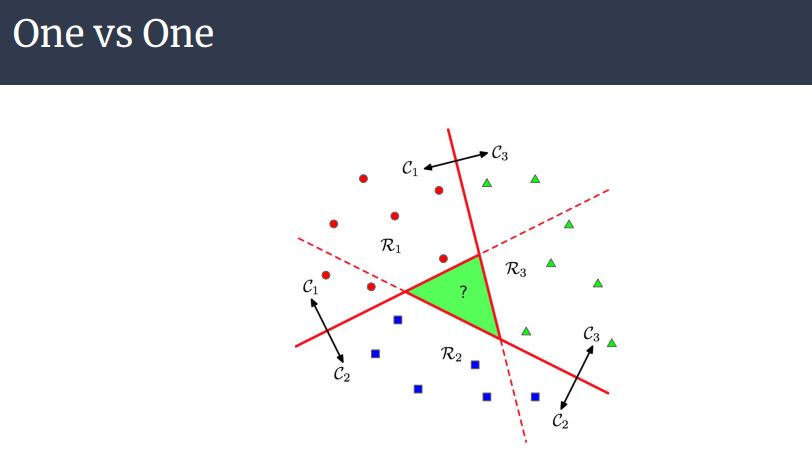

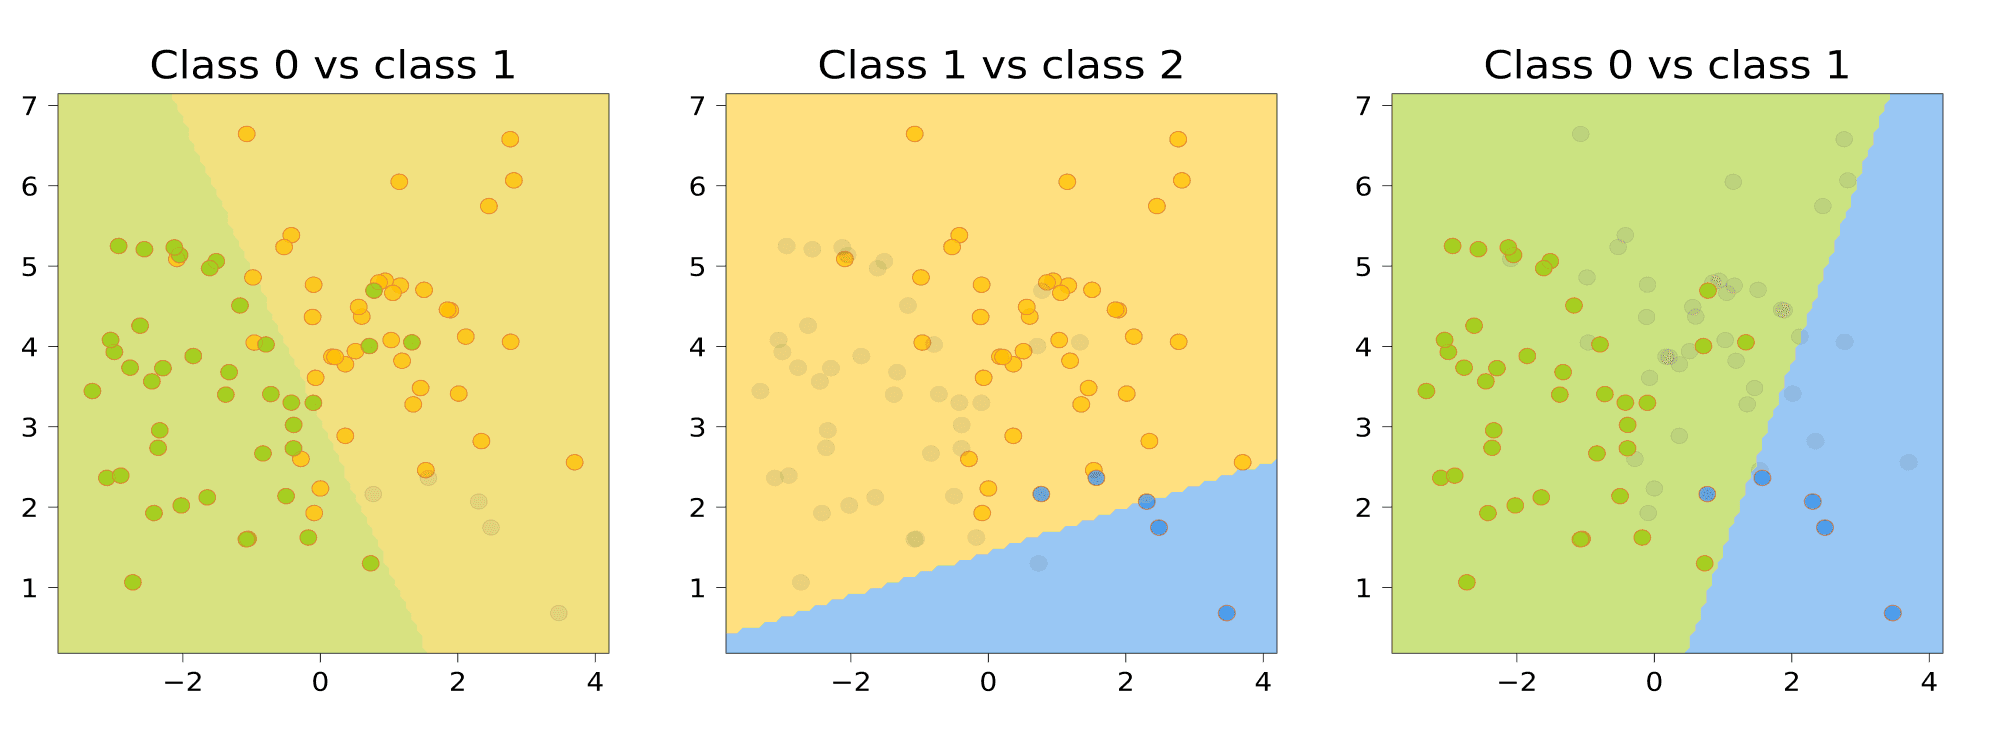

Чтобы классифицировать новый объект, подадим его на вход каждого из построенных бинарных классификаторов. Каждый из них проголосует за свой класс; в качестве ответа выберем тот класс, за который наберется больше всего голосов

Основные отличия способов

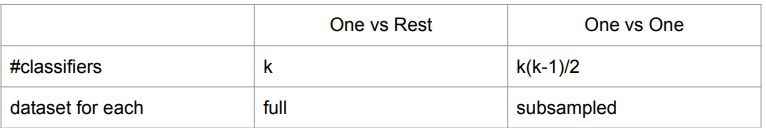

**Однако логистическую регрессию можно обощить ещё одним, более элегантным способом**

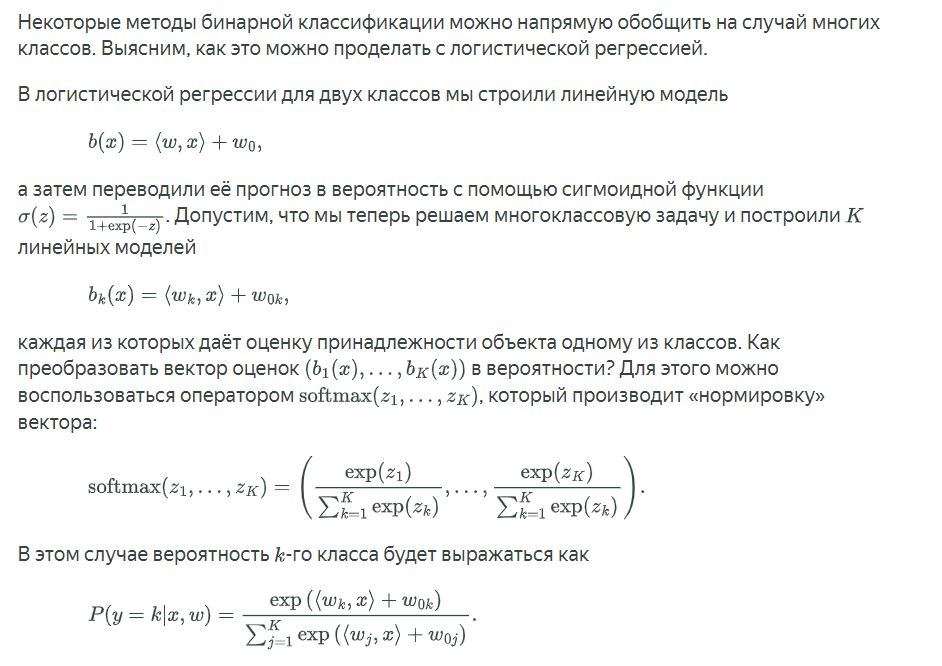

## **5. Реализация модели на numpy**


In [9]:
import numpy as np

In [10]:
def sigmoid(x):
        return 1/(1+np.exp(-x))
    
class CoolLogisticRegression():
    def __init__(self, learning_rate = 0.0001, gd_iterations = 1000 ,regularizator = 'No', regularization_coef = 0.1):
        self.lr = learning_rate
        self.reg = regularizator
        self.lyambda = regularization_coef
        self.iters = gd_iterations
        self.loss = {
            'l1': lambda p, y: (1/len(y))*(-y@np.log(sigmoid(p)) - (1-y)@(np.log(1-sigmoid(p)))) + self.lyambda*np.linalg.norm(self.weights, ord=1),
            'l2': lambda p, y: (1/len(y))*(-y@np.log(sigmoid(p)) - (1-y)@(np.log(1-sigmoid(p)))) + self.lyambda*np.square(np.linalg.norm(self.weights)),
            'No': lambda p, y: (1/len(y))*(-y@np.log(sigmoid(p)) - (1-y)@(np.log(1-sigmoid(p))))
        }[regularizator]
        self.loss_grad = {
            'l1': lambda X, p, y: (1/len(y))*X.T@(p - y) + 2 * np.array([self.lyambda if i >= 0 else -self.lyambda for i in self.weights]),
            'l2': lambda X, p, y: (1/len(y))*X.T@((p - y)) + 2*self.weights*self.lyambda,
            'No': lambda X, p, y: (1/len(y))*X.T@((p - y)),
        }[regularizator]
        self.weights = None
        self.b = None
        self.losses = []
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features)
        self.b = 0
        losses = []
        for _ in range(self.iters):
            pred = sigmoid(X@self.weights + self.b)
            losses.append(self.loss(pred, y))
            dw = self.loss_grad(X, pred, y)
            db = (1/n_samples)*np.sum((pred - y))

            self.weights -= self.lr*dw
            self.b -= self.lr*db
        self.losses = losses

    def predict(self,X):
        return sigmoid(X@self.weights + self.b) #Оператор * делает поэлементное умножение!, а @ - векторное

    def get_losses(self):
        return self.losses
    def get_weights(self):
        return self.weights

## Проверим на датасете

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
df = pd.read_csv('../Datasets/Classification/train.csv')
target = df['price_range']
df_X = df.drop(columns='price_range')


In [13]:
target.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

Упс, классов-то не 2, а целых 4. Но к счастью мы уже разобрались как работать в такой ситуации. 
Обучим 4 модели:
1) Отделяет класс 0 от остальных (0 становится 1, а 1,2,3 - 0)
2) Отделяет класс 1 от остальных (1 становится 1, а 0,2,3 - 0)
3) Отделяет класс 2 от остальных (2 становится 1, а 1,0,3 - 0)
4) Отделяет класс 3 от остальных (3 становится 1, а 1,2,0 - 0) 

[Отличная статья про мультиклассовую логистическую регрессию](https://www.dmitrymakarov.ru/opt/logistic-regression-05/#34-multiklassovaya-logisticheskaya-regressiya) - здесь реализованы OVR и SOFTMAX
Идея softmax  в том, чтобы не создавать кучу датасетов, а заодировать в исходном целевую переменную OHE и обучать матрицу весов. Подробнее - в статье

In [14]:
from copy import deepcopy, copy

def prepare_datasets(X:pd.DataFrame, y:pd.DataFrame, classes:int, target:str) -> list[pd.DataFrame]:   
    """
    Функция, подгототавливающая такое кол-во датасетов для one-vs-all задачи, которое ровно числу classes.
    Возвращает список датасетов классы закодированы в порядке возрастания начиная с 0. 
    """
    X_df = X.copy()
    y_df = y.copy()
    X_df[target] = y_df
    data_frames =[]
    for i in range(classes):
        bin_df = X_df.drop(columns=target).copy()
        bin_df[target] = np.where(X_df[target] == i, 1, 0)
        data_frames.append(bin_df)
    return data_frames

def fit_predict_n_models(model_class, data_frames:list[pd.DataFrame], target:str, **kwargs):
    """
    Обучает такое кол-во моделей, которое равно кол-ву датафреймов в data_frames.
    Возавращает список моделей, расположенных в том порядке, равном порядку датафреймов в data_frames
    """
    models = []
    for df in data_frames:
        f_model = model_class(**kwargs)
        f_model.fit(df.drop(columns=target), df[target])
        models.append(f_model)
    return models

def predict(X, models):
    """
    Каждая модель из models предсказывает
    """
    all_preds = []
    for model in models:
        all_preds.append(model.predict(X))
    all_preds = np.array(all_preds)
    return np.argmax(all_preds.T,axis = 1), all_preds.T

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_X, target, test_size=0.2 ,random_state=42)
data_frames = prepare_datasets(X_train, y_train, 4, "price_range")
models = fit_predict_n_models(CoolLogisticRegression, data_frames,"price_range", gd_iterations = 20000, regularizator='l2', regularization_coef=0.0001)

In [16]:
preds, probs = predict(X_test, models)

In [17]:
accuracy_score(preds, y_test)

0.5375

## **6. Сравнение реализации с sklearn**

В sklearn также есть режим мультаклассовой классификации. 
Чтобы его применить достаточно в параметрах модели добавить multi_class = 'ovr' или multi_class = 'multinomial' - это софтмакс. one_vs_one похоже отсутствует
Проверим как работают эти реализации

In [18]:
from sklearn.linear_model import LogisticRegression

ovr_model = LogisticRegression(multi_class = 'ovr')
ovr_model = ovr_model.fit(X_train, y_train)
y_pred = ovr_model.predict(X_test)
 
accuracy_score(y_pred, y_test)


c:\Users\Maksim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.72

In [19]:
softmax = LogisticRegression(multi_class = 'multinomial')
softmax = softmax.fit(X_train, y_train)
y_pred = softmax.predict(X_test)
 
accuracy_score(y_pred, y_test)

c:\Users\Maksim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6325

Можно заметить, что KNN на том-же датсаете показала наилучшие результаты. Наверное, такой плохой результат связан с той самой ошибкой ovr, о которой мы говорили в теории. 

## Проверим реализацию OVR из статьи

In [20]:
class OVR_LogReg():
 
  def __init__(self):
    self.models_thetas = []
    self.models_loss = []
 
  def fit(self, x, y, iter = 20000, learning_rate = 0.001):
 
    dfs = self.preprocess(x, y)
 
    models_thetas, models_loss = [], []
 
    for ovr_df in dfs:
 
      x = ovr_df.drop('target', axis = 1).copy()
      y = ovr_df.target.copy()
 
      self.add_ones(x)
 
      loss_history = []
      thetas, n = np.zeros(x.shape[1]), x.shape[0]
 
      for i in range(iter):
        y_pred = self.h(x, thetas)
        loss_history.append(self.objective(y, y_pred))
        grad = self.gradient(x, y, y_pred, n)
        thetas -= learning_rate * grad
 
      models_thetas.append(thetas)
      models_loss.append(loss_history)
 
    self.models_thetas = models_thetas
    self.models_loss = models_loss
 
  def predict(self, x):
    x = x.copy()
    probs = []
    self.add_ones(x)
    for t in self.models_thetas:
      z = np.dot(x, t)
      prob = np.array([self.stable_sigmoid(value) for value in z])
      probs.append(prob)
 
    all_probs = np.concatenate(probs, axis = 0).reshape(len(probs), -1).T
    y_pred = np.argmax(all_probs, axis = 1)
 
    return y_pred, all_probs
 
  def preprocess(self, x, y):
 
    x, y = x.copy(), y.copy()
 
    x['target'] = y
    classes = x.target.unique()
    
    dfs = []
    ovr_df = None
 
    for c in classes:
      ovr_df = x.drop('target', axis = 1).copy()
      ovr_df['target'] = np.where(x['target'] == classes[c], 1, 0)
      dfs.append(ovr_df)
 
    return dfs
  
  def add_ones(self, x):
    return x.insert(0,'x0', np.ones(x.shape[0]))
 
  def h(self, x, thetas):
    z = np.dot(x, thetas)
    return np.array([self.stable_sigmoid(value) for value in z])
 
  def objective(self, y, y_pred):
    y_one_loss = y * np.log(y_pred + 1e-9)
    y_zero_loss = (1 - y) * np.log(1 - y_pred + 1e-9)
    return -np.mean(y_zero_loss + y_one_loss)
 
  def gradient(self, x, y, y_pred, n):
    return np.dot(x.T, (y_pred - y)) / n
 
  def stable_sigmoid(self, z):
    if z >= 0:
        return 1 / (1 + np.exp(-z))
    else:
        return np.exp(z) / (np.exp(z) + 1)

In [21]:
model = OVR_LogReg()
model.fit(X_train, y_train)
 
y_pred, probs = model.predict(X_test)
accuracy_score(y_pred, y_test) 

0.42

Эта модель очень долго обучалась при тех же параметрах, что и моя и выдала результат хуже моей реализации. Заявляю, что превзошел автора статьи.